# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛するので，コードの内容の理解は必須とはしない（実行結果を見やすくするための「おまじない」と考えればよい）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [2]:
# コードB：共通事前処理

#B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

#必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib #matplotlib日本語化対応
import seaborn as sns

#B2:データフレーム表示用関数
from IPython.display import display

#B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

#B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

#乱数の種
random_seed = 123

## コードAの補足
このコードは，Pythonのパッケージを管理するためのシステムである`pip`を使用して，japanize-matplotlibというライブラリをインストールし，その出力の最後の1行だけを表示する．
  
*  `! pip install japanize-matplotlib`: `pip`の`install`コマンドを使って，japanize-matplotlibパッケージをインストールする．japanize-matplotlibは，Matplotlibライブラリで日本語の文字表示を可能にするためのパッケージである．
*  `| tail -n 1`: Unix/Linuxの`tail`コマンドを使って，インストールプロセスの出力のうち最後の1行のみを表示する．パイプ`|`によって，`install`コマンドの出力が`tail`コマンドの入力となる．`-n 1`オプションは，末尾から1行だけを取得することを指定している．  
  
このコードは，Jupyter NotebookやGoogle ColaboratoryのようなPythonのインタラクティブな実行環境で使用されることが多い．`!`をコマンドの前に付けることで，Python環境内からシステムのコマンドを実行することができる．この場合，japanize-matplotlibのインストールが成功したかどうか，または関連する最後のメッセージを確認するために使われています．

## コードBの補足
### B1:余分なワーニングを非表示にする
この部分のコードで，コード実行後に表示される警告メッセージを非表示にしている．具体的には，Pythonの標準ライブラリである`warnings`モジュールの`filterwarnings`関数を使用する．`warnings`モジュールは、開発者（プログラマ）に警告（非致命的なエラーなど）を発するためのモジュールである．  
  
*  `import warnings`: `warnings`モジュールをインポートする．
*  `warnings.filterwarnings('ignore')`: `filterwarnings`関数を使って，発生する警告を非表示にする（無視する）．

この処理は，特定の警告が表示されることがわかっており，それによる出力が実行結果の可読性を損なう場合などに使われる（本講義でもこの目的で使っている）．ただし，警告メッセージはコードに潜在的な問題があることを知らせる重要な手がかりを提供するので，慎重に使用する必要がある．

### B2:データフレーム表示用関数
この部分のコードで，`IPython.display`モジュールから`display`関数をインポートしている．`IPython.display`モジュールは，IPython環境（Jupyter NotebookやGoogle Colaboratoryを含む）内でリッチなウェブベースのコンテンツを表示するためのツール群を提供する．

`display`関数は，様々な形式のデータやメディアを豊かに表示するために使われる。．例えば，HTML，画像，DataFrame等の表示が含まれる．この関数を使用することで，標準の出力よりも見やすい表示にできる．

### B3:表示オプション調整
この部分のコードで，NumPyとPandasを使用する際の小数点以下の桁数表示を設定している．

*  `np.set_printoptions(suppress = True, precision = 3)`:
    *  `suppress = True`: 指数表記（例: `1e-4`）を使用しない．
    *  `precision = 3`: 表示する小数点以下の桁数を3桁に設定する．
    *  これにより，NumPyの配列の各要素が小数点以下3桁までの精度で表示される．
*  `pd.options.display.float_format = '{:.3f}'.format`:
    * PandasのDataFrameやSeries内のデータ型がfloatの数値に対するフォーマットを設定する．
    * `'{:.3f}'.format`: 小数点以下3桁までの精度で表示するように設定している．
*  `pd.set_option('display.max_columns', None)`:
    *  `pd.set_option`: DataFrameの表示行数や列数などが指定できる．
    *  `display.max_columns`: 表示する最大のカラム数を指定する．
    *  `display.max_columns`の後ろに`None`を設定することで，DataFrameの列数の制限をなくし，利用可能なすべての列を表示することができる．


### B4:グラフのデフォルトフォント指定
この部分のコードで，matplotlibのグラフにおける文字サイズを設定している．`plt.rcParams`には，matplotlibのデフォルト設定が格納されている辞書型のデータ（辞書）である．この辞書を通じて，グラフの様々な視覚的要素（文字サイズ，線の太さ，色など）のデフォルト値を設定できる．
  
`plt.rcParams['font.size'] = 14`で，グラフ内のテキスト（タイトル，軸ラベル，凡例など）のデフォルトの文字サイズを14ポイントに設定している．








# 1次元データの要約

## データの読み込み
*  構造化（表形式）データをcsvファイルとして保存している場合には，そのファイルを読み込んでDataFrameに変換すると便利
*  pandasの`read_csv`関数を使うと，引数に指定したcsvファイルのデータをDataFrameとして定義できる
*  書式: `pd.read_csv(ファイルの場所（URLやパス）)`
*  データ例として，以下のURLにあるcsvファイル（試験データその1）を用いる．
>*  https://bit.ly/4if17aE
*  このデータは架空の試験結果になっており，1000人分の英語，国語，数学，社会，理科の得点とそれらの合計得点を示している

**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam`に代入
*  3行目: `display`関数を使ってデータ（`df_exam`の内容）を表示


In [ ]:
url = 'https://bit.ly/4if17aE'
df_exam = pd.read_csv(url)
display(df_exam)

,english,japanese,math,social,science,total
0,36,40,35,68,35,214
1,47,87,57,86,56,333
2,73,68,87,93,90,411
3,47,96,63,88,63,357
4,85,83,89,91,92,440
...,...,...,...,...,...,...
995,52,65,57,62,57,293
996,50,67,39,61,37,254
997,69,86,68,80,69,372
998,56,51,30,100,29,266


## 1次元データの数値化

### 各種統計量の計算
*  DataFrameに対する `describe`メソッドを使うと代表的な統計量を一括で計算できる

|表示|統計量|
|:-:|:-:|
| count | データ数 |
| mean  | 算術平均 |
| std | 標準偏差 |
| min | 最小値 |
| 25% | 第1四分位数 |
| 50% | 中央値 |
| 75% | 第3四分位数 |
| max | 最大値 |

In [5]:
url = 'https://bit.ly/4if17aE'
df_exam = pd.read_csv(url)
display(df_exam.describe())

,english,japanese,math,social,science,total
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,64.591,64.701,64.635,63.940,65.453,323.320
std,20.124,20.522,20.728,20.109,22.516,56.745
min,30.000,30.000,30.000,30.000,26.000,171.000
25%,48.000,47.000,46.000,47.000,45.000,284.000
50%,64.000,64.000,66.000,63.000,67.000,325.000
75%,81.000,83.000,83.000,80.000,85.000,364.000
max,100.000,100.000,100.000,100.000,100.000,488.000


## 1次元データの可視化

### ヒストグラムの作成
*  ヒストグラムなどのグラフをPythonで作成する場合には，matplotlibと呼ばれるライブラリのpyplotモジュールがよく使われる
*  pyplotのインポートは省略形pltを使った記述が多い
>*  書式: `import matplotlib.pyplot as plt`
*  ヒストグラムを作成する場合はpyplotの`hist`関数を使う
*  引数には1次元データを指定する
*  DataFrameの場合は1列のみを引数に指定する
*  DataFrameの特定の列は「`DataFrame['列インデックス']`」で指定できる
*  引数に「`bins = 階級数`」を指定することで階級数が指定できる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam`に代入
*  3行目: 合計得点（total列）のヒストグラムを作成
>*  `exam['total']`でインデックス「total」の列のみを指定
>*  `bins = 階級数15` で階級数を15に指定
*  4～5行目: pyplotの`xlabel`関数と`ylabel`関数で横軸と縦軸の名前を指定
>*  横軸のラベルを「total」とする
>*  縦軸のラベルを「度数」とする
*  6行目: `show`関数を呼び出すとそれまでに設定したグラフを実行画面に表示する（引数なし）※このコードの場合は呼び出さなくても実行できる

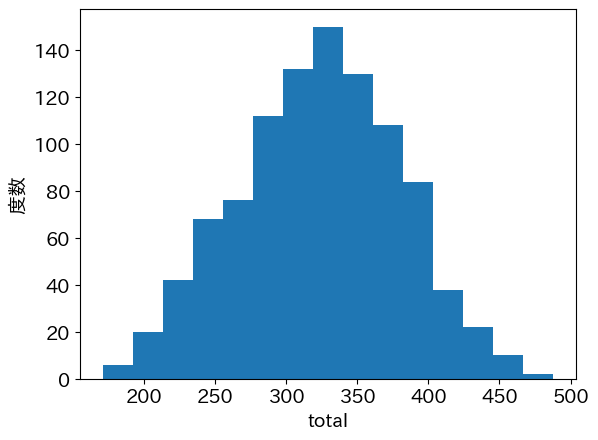

In [6]:
url = 'https://bit.ly/4if17aE'
df_exam = pd.read_csv(url)
plt.hist(df_exam['total'], bins=15)
plt.xlabel('total')
plt.ylabel('度数')
plt.show()

### 箱ひげ図の作成
*  pyplotの`boxplot`関数で箱ひげ図が作成できる
*  引数にDataFrameを指定すると，すべての列データに対する箱ひげ図が作成される
*  また，特定の列を指定することもできる

**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam`に代入
*  3行目: english列とjapanese列の箱ひげ図を作成
*  4行目: `xticks`関数で，横軸（x軸）のラベルを設定
>*  1つ目の引数に座標値（数値）を指定
>*  2つ目の引数に置き換え文字列を指定
>*  `plt.xticks([1, 2], ['english', 'japanese'])` ⇒ 座標値が1のところをenglish，2のところをjapaneseに置き換える
*  5行目: `show`関数で，それまでに設定したグラフを実行画面に表示


**［箱ひげ図の見方］**
*  箱の上底： 第3四分位点
*  箱の下底： 第1四分位点
*  箱の中の線： 中央値
*  ひげ（箱から伸びている線）の上端／下端： 最大値／最小値（外れ値を除く）
*  白丸○: 外れ値
*  最大値・最小値の外側の円：外れ値

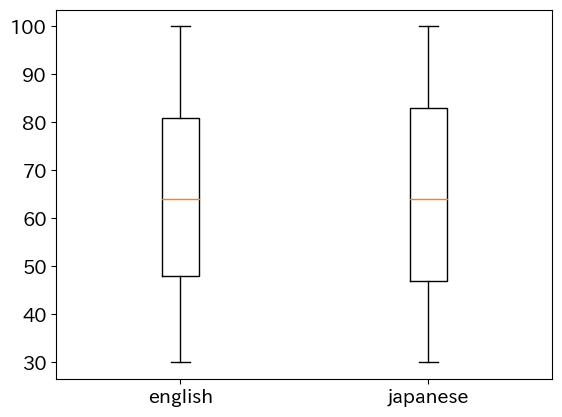

In [ ]:
url = 'https://bit.ly/4if17aE'
df_exam = pd.read_csv(url)
plt.boxplot(df_exam[['english', 'japanese']])
plt.xticks([1, 2], ['english', 'japanese'])
plt.show()

### バイオリンプロットの作成
*  バイオリンプロットは，箱ひげ図に分布の曲線を加えたような図
*  pyplotの`violinplot`関数を使って作成できる
*  箱ひげ図と同様に，`violinplot`関数の引数にDataFrameを指定すると，すべての列データに対するバイオリンプロットが作成される
*  特定の列を指定することもできる
*  `showmedians`を引数に指定することで，中央値を示す線の表示・非表示が設定できる
>*  `showmedians = True`: 表示
>*  `showmedians = False`: 非表示（デフォルト）

**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam`に代入
*  3行目: `violinplot`関数で，合計得点（total列）のバイオリンプロットを作成
>*  `df_exam['total']`でtotal列を指定
>*  `showmedians = True`で中央値を示す線を表示
*  4行目: `xticks`関数で，横軸のラベルを「total」とする
*  5行目: `show`関数で，それまでに設定したグラフを実行画面に表示

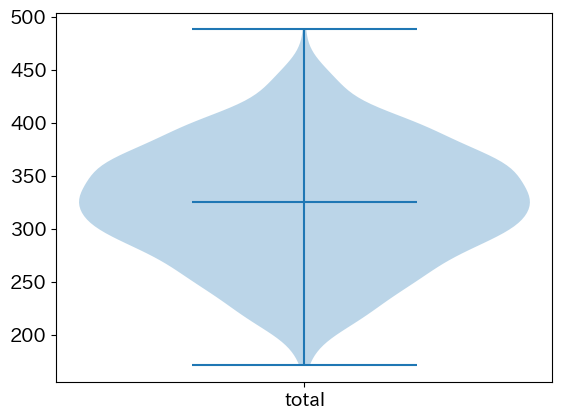

In [17]:
url = 'https://bit.ly/4if17aE'
df_exam = pd.read_csv(url)
plt.violinplot(df_exam['total'], showmedians = True)
plt.xticks([1], ['total'])
plt.show()

# 2次元データの要約

## データの読み込み
*  データ例として，以下のURLにあるcsvファイル（試験データその2）を用いる
>*  https://bit.ly/4kjzBL6
*  このデータは架空の試験結果になっており，20人分の5科目試験（国語，数学，英語，理科，社会）の得点を示している
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `display`関数を使ってデータ（`df_exam2`の内容）を表示

In [8]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
display(df_exam2)

,国語,数学,英語,理科,社会
0,84,63,85,64,86
1,80,64,76,69,80
2,77,66,81,68,78
3,81,73,86,78,81
4,78,70,81,74,75
5,69,71,77,74,72
6,72,70,76,72,82
7,63,63,71,74,65
8,66,53,67,62,72
9,70,65,72,66,68


## 散布図の作成
*  pypolotの`scatter`関数で散布図を作成できる
*  `scatter`関数の引数にDataFrameの列データを2つ指定する
>*  1つ目の引数: 横軸に取りたいデータの列名
>*  2つ目の引数: 縦軸に取りたいデータの列名
*  `xlabel`関数，`ylabel`関数で各軸のラベルを設定できる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `scatter`関数を使って国語と数学の散布図を作成
>*  `df_exam2['国語']`でx軸を指定
>*  `df_exam2['数学']`でy軸を指定
*  4～5行目: `xlabel`関数と`ylabel`関数各軸のラベルをそれぞれ「国語」「数学」に設定
*  6行目: `show`関数で，それまでに設定した図（国語と数学の散布図）を実行画面に表示
*  7～9: 同様にして国語と英語の散布図を作成
*  10行目: `show`関数で，それまでに設定した図（国語と英語の散布図）を実行画面に表示

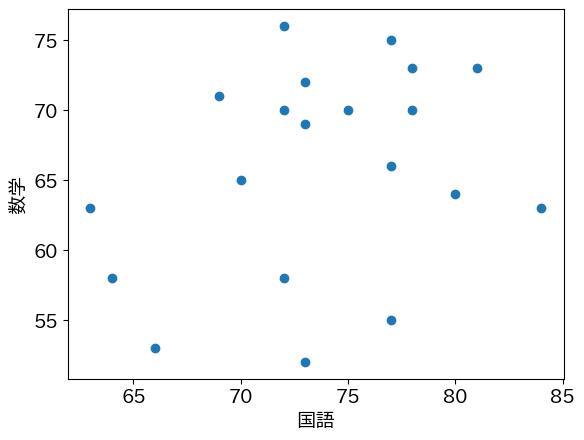

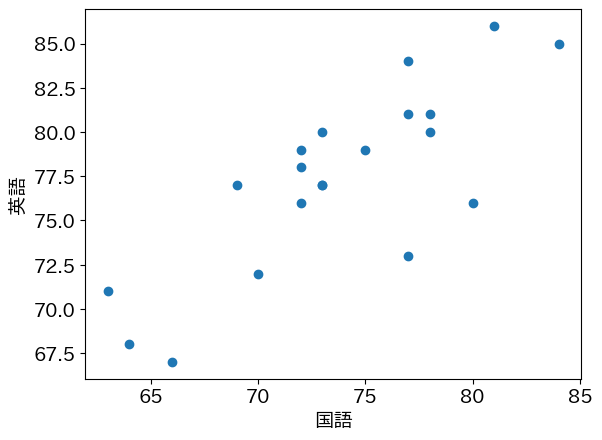

In [16]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
plt.scatter(df_exam2['国語'], df_exam2['数学'])
plt.xlabel('国語')
plt.ylabel('数学')
plt.show()
plt.scatter(df_exam2['国語'], df_exam2['英語'])
plt.xlabel('国語')
plt.ylabel('英語')
plt.show()

### 散布図から読み取れること
*  国語と数学の得点には相関がなさそう
*  国語と英語の得点には強い正の相関がある

## 散布図行列の作成
*  3つ以上の変数に対しては複数の散布図が作成できる
*  例えば，試験データその2は5つ（5科目）の変数があるので，10パターンの散布図が作成できる
*  複数の変数の組合せに対する散布図を行列の形式で並べたものを散布図行列と呼ぶ（対角成分の位置には各変数のヒストグラムを描画） 
*  散布図行列を作成するにはseabornモジュール（`sns`と略してインポート）の`pairplot`関数を用いる
*  `pairplot`関数の引数には，DataFrameの複数の列データを指定する
*  DataFrame自身を引数とすると，すべての列データに対する散布図行列が作成される
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `pairplot`関数を使って散布図行列を作成
*  4行目: `show`関数で，それまでに設定した図（散布図行列）を実行画面に表示

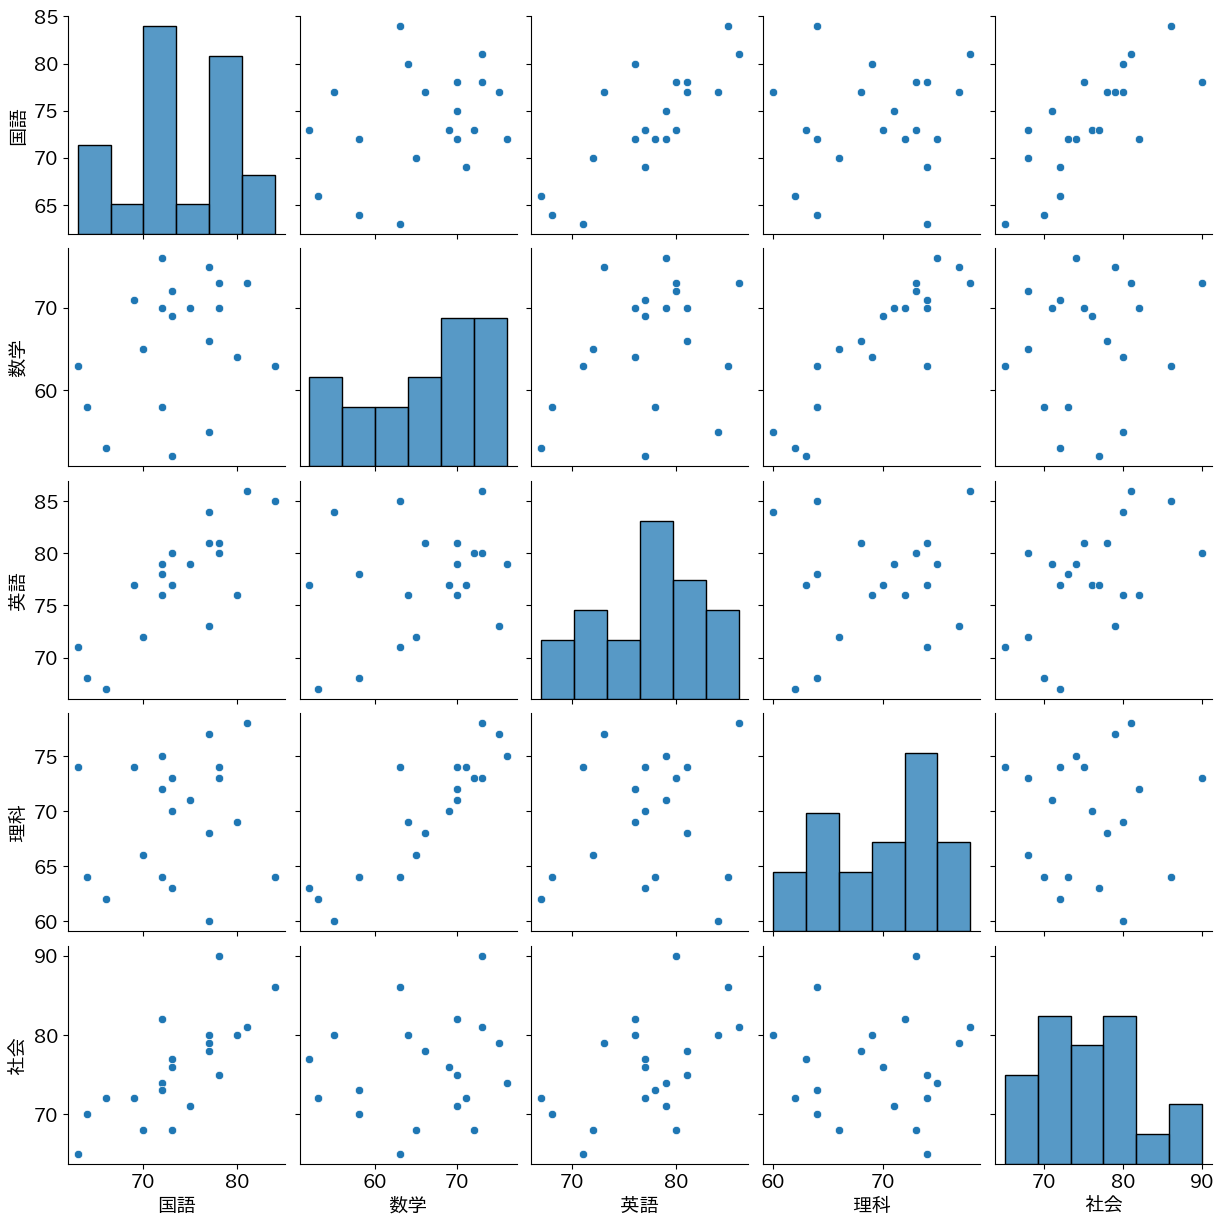

In [18]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
sns.pairplot(df_exam2)
plt.show()

## 分散共分散行列の計算
* 分散（標本分散／不偏分散）と共分散を行列の形式で並べたものを分散共分散行列と呼ぶ
* 分散共分散行列は`cov`メソッドで計算でき，引数には計算対象とする列名のリストを指定する
* 引数`ddof`で分散と共分散の分母を指定することができる
>*  `ddof = 0` ⇒ $n$で割った標本分散と共分散（標本共分散）を計算
>*  `ddof = 1` ⇒ $n-1$で割った不偏分散と不偏共分散を計算
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `cov`メソッドで，国語と数学（`df_exam2[['国語', '数学']]`）の分散共分散行列を計算し，`display`関数で表示
>*  `ddof = 0`なので，分母をnとした標本分散と共分散（標本共分散）を計算している

In [19]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
display(df_exam2[['国語', '数学']].cov(ddof = 0))

,国語,数学
国語,29.210,11.840
数学,11.840,51.660


*  3つ以上の列データを指定するとすべての組み合わせの共分散が計算できる
*  対角成分は各データの標本分散または不偏分散


**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `cov`メソッドで，5科目すべて（`df_exam2`）の分散共分散行列を計算し，`display`関数で表示
>*  `ddof = 0`なので，分母をnとした標本分散と共分散（標本共分散）を計算している

In [20]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
display(df_exam2.cov(ddof = 0))

,国語,数学,英語,理科,社会
国語,29.210,11.840,21.955,3.965,25.105
数学,11.840,51.660,11.270,33.710,7.020
英語,21.955,11.270,25.528,4.508,16.853
理科,3.965,33.710,4.508,27.348,0.683
社会,25.105,7.020,16.853,0.683,37.928


## 相関係数の計算
*  相関係数はDataFrameの`corr`メソッドで計算でき，引数には計算対象とする列名のリストを指定する
*  結果は，`cov`メソッドと同様に行列形式で表示される
*  対角成分は，同じ変数同士の相関係数を計算しているので，常に1となる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `cov`メソッドで，国語と数学（`df_exam2[['国語', '数学']]`）の相関係数を計算し，`display`関数で表示

In [21]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
display(df_exam2[['国語', '数学']].corr())

,国語,数学
国語,1.000,0.305
数学,0.305,1.000


*  分散共分散行列と同様に相関係数も複数データに対して，まとめて計算・表示することができる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `cov`メソッドで，5科目すべて（`df_exam2`）の相関係数を計算し，`display`関数で表示

In [22]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
display(df_exam2.corr())

,国語,数学,英語,理科,社会
国語,1.000,0.305,0.804,0.140,0.754
数学,0.305,1.000,0.310,0.897,0.159
英語,0.804,0.310,1.000,0.171,0.542
理科,0.140,0.897,0.171,1.000,0.021
社会,0.754,0.159,0.542,0.021,1.000


## ヒートマップの作成
*  ヒートマップとは数値データ（ここでは相関係数）の大小を色で視覚化する方法である
*  相関係数のヒートマップは，seabornの`heatmap`関数で作成でき，引数に`corr`メソッドで求めた相関係数の行列（ヒートマップで表したいデータ）を指定する  
*  その他の引数は以下のとおり:
>*  `annot = True`: 数値を表示，指定しないとFalse（非表示）
>*  `vmin`: データの最小値を指定
>*  `vmax`: データの最大値を指定
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam2`に代入
*  3行目: `cov`メソッドで，5科目すべて（`df_exam2`）の相関係数を計算し，変数`r`に代入
*  4行目: `heatmap`関数を使って，相関係数`r`のヒートマップを作成
>*  1つ目の引数に相関係数が代入されている変数`r`を指定
>*  `annot=True` ⇒ 数値を表示，指定しないと False（非表示）
>*  `vmin`, `vmax` ⇒ データの最小値`-1`と最大値`1`を指定
*  4行目: `show`関数で，それまでに設定した図（ヒートマップ）を実行画面に表示

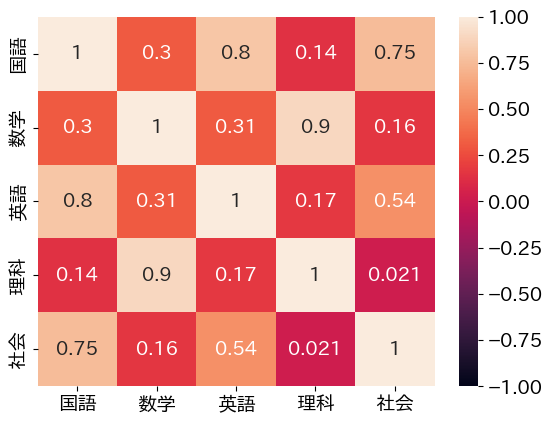

In [3]:
url = 'https://bit.ly/4kjzBL6'
df_exam2 = pd.read_csv(url)
r = df_exam2.corr()
sns.heatmap(r, annot=True, vmin = -1, vmax = 1)
plt.show()